# Customizable SNP Detection Tool
This tool reads two fasta files containing the same genomic sequence length and returns the SNPs detected in them. 
Please be sure of the following for the tool to work correctly, 
1. upload only 2 files, and the original sequence file should have the string 'seq' in it and the query![alt text](https://) doesn't.
2. be sure that both sequences are of equal length.
3. be sure to run all the cells so you can download the figure and the output text file at the end.
4. Careful to follow the following instructions accurately. 

## Running instructions
1. click "Open in Playground".
2. from the upper taskbar choose "Runtime" > "Run All".
3. Choose files in the output of the third cell.



# Installing and importing essential backages


In [0]:
!pip install biopython

ERROR! Session/line number was not unique in database. History logging moved to new session 59
     |████████████████████████████████| 2.3MB 2.7MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np 
from Bio import SeqIO

# Upload files

In [0]:
from google.colab import files
uploaded = files.upload()
print(uploaded)


Saving Mutated.fasta to Mutated.fasta
Saving sequence (1).fasta to sequence (1).fasta
{'Mutated.fasta': b'>NC_000011.10:c5227071-5225464 Homo sapiens chromosome 11, GRCh38.p13 Primary Assembly\r\nACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCACCTGACTCCTGT\r\nGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGC\r\nAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAG\r\nACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGG\r\nTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGG\r\nCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGAC\r\nAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACT\r\nTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAG\r\nGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAAGAGACGAATGATTGCATCAGTGTGGAAGTCT\r\nCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCT\r\nTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAG

In [11]:
names = sorted(list(uploaded.keys()))
if "seq" in names[0]:
  sequence = names[0]
  mutated = names[1]
else:
  sequence = names[1]
  mutated = names[0]
print("Original Sequence Files is "+sequence)
print("and the Query Files is " + mutated)

Original Sequence Files is sequence (1).fasta
and the Query Files is Mutated.fasta


# The Code

There is/are 3 Mutation/s.
A	00070	T
C	00600	G
A	01538	G


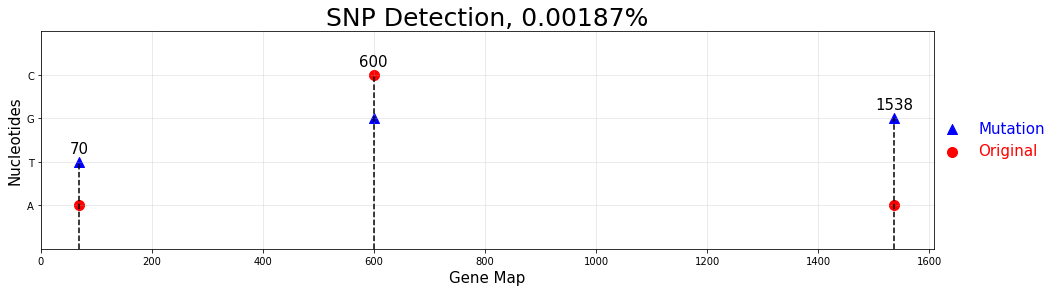

In [14]:
seq = SeqIO.parse(open(sequence, mode='r'), 'fasta')
mut = SeqIO.parse(open(mutated, mode='r'), 'fasta')

for s in seq: 
    SEQ = s.seq
    #print(SEQ)

for m in mut:
    MUT = m.seq
    #print(MUT)
    
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner()

a = str(list(aligner.align(SEQ, MUT))[0]).split("\n")

def replacingFunc(a):
    original = a[0]
    detection = a[1]
    mutated = a[2]
    splittedOriginal = original.split('-')
    splittedMutated  = mutated.split('-')
    n = len(splittedOriginal) - 1
    
    original = ''.join(splittedOriginal)
    mutated = ''.join(splittedMutated)
    
    splittedDetection = detection.split('--')
    detection = '-'.join(splittedDetection)

    return original, detection, mutated, n

o ,d, m, n= replacingFunc(a)
l = len(o)

MutationLocation = [pos for pos, char in enumerate(d) if char == '-']
txt = []
txt.append("There is/are "  +str(n) + " Mutation/s.")

for i in range(n):
    w = MutationLocation[i]+1
    txt.append(str(o[MutationLocation[i]])+"\t"+f"{w:05d}"+"\t"+str(m[MutationLocation[i]]))

file_out = "Comparison.txt"

file1 = open(file_out,"w")#write mode 
for t in txt: 
    file1.write(t)
    print(t)
    file1.write("\n")
file1.write("\n")
file1.write("Variation Percentage = "+str(np.round(n/l,5))+"%")
file1.write("\n")
file1.write("\n")

for i in [o, d, m]:
    file1.write(i) 
    file1.write("\n")

file1.close() 

def AssignLetter(ch):
    if   ch=="A": return 1
    elif ch=="T": return 2
    elif ch=="G": return 3
    elif ch=="C": return 4
    
ytickss = ["A","T","G","C"]



fig = plt.figure(figsize =(16,4))
x = np.arange(0,l,1)
y = np.zeros_like(x)
z = np.zeros_like(x)
#plt.xticks(x)
flag = 1
for muta in MutationLocation:
    if flag:
        plt.scatter(muta, AssignLetter(m[muta]),s = 100,label = "Mutation",color='b',marker='^')
        plt.scatter(muta, AssignLetter(o[muta]),s = 100,label = "Original",color='r')
        flag = 0
    else:
        plt.scatter(muta, AssignLetter(m[muta]),s = 100,color='b',marker='^')
        plt.scatter(muta, AssignLetter(o[muta]),s = 100,color='r')
    
    bigger = AssignLetter(m[muta])
    if AssignLetter(o[muta]) > bigger:
        bigger = AssignLetter(o[muta])
    
    const = np.arange(0,bigger+0.5,0.5)
    constX = np.full(len(const),muta)
    plt.plot(constX, const,'k--')    
    plt.text(muta, bigger+0.2,str(muta+1),fontsize=15,ha='center')
    
plt.yticks([1,2,3,4],ytickss)
plt.xlim(0,l)
plt.ylim(0,5)
plt.ylabel("Nucleotides",fontsize=15)
plt.xlabel("Gene Map",fontsize=15)
plt.title("SNP Detection, "+str(np.round(n/l,5))+"%",fontsize=25)
leg = plt.legend(fontsize=15,bbox_to_anchor=(1.14, 0.65),frameon=False)
colors=  ['b','r'] 
for t,text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[t])
plt.grid(alpha = 0.3)
plt.savefig("SNP Detection.png",dpi=500)

In [0]:
files.download("SNP Detection.png") 
files.download(file_out)
